# Exploring Berlin Airbnb Data

In this notebook I explore the Airbnb data from: http://insideairbnb.com/get-the-data.html for the city of Berlin.


## 1. Business Understanding

Airbnb provides a platform for homesharing. I address three questions to support the discussions on Airbnb in Berlin:

1. How is the situation of Airbnb in Berlin? 
2. Are so called "gentriefied" areas are more affected by Airbnb?
3. Does the regulation of Airbnb by the goverment work effectively?



## 2. Data Understanding

I explore two files gathered from Inside Airbnb for Berlin:

listings.csv (data of the airbnb listings for Berlin)

calender.csv (data of the calender shows the availabilty of the offerings)


In [1]:
# loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

#basis settings
pd.set_option('display.max_columns',None)
%matplotlib
%matplotlib inline 

Using matplotlib backend: Qt5Agg


In [2]:
# loading the data

df_list = pd.read_csv('listings.csv')
df_cal = pd.read_csv('calendar.csv')
df_population = pd.read_excel('Population_berlin.xlsx')

In [3]:
df_list.head(30)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2695,https://www.airbnb.com/rooms/2695,20180814184211,2018-08-14,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$15.00,1,$15.00,2,40,a week ago,t,1,1,1,1,2018-08-14,2,2018-07-04,2018-07-20,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.43
1,2776,https://www.airbnb.com/rooms/2776,20180814184211,2018-08-15,"Spacious, Quiet, Bright, 10mn Alex, direct Tegel",Beautiful quiet and sunny bedroom in a clean f...,"Quiet and sunny bedroom in a clean, beautiful ...",Beautiful quiet and sunny bedroom in a clean f...,none,Central typical Berlin neighborhood. Convenie...,Kids and families are welcome!,3 min. walk to subway and tram (2 subway lines...,"Refurbished, clean and spacious bathroom.",As much help as needed by mail/ phone or direc...,"Pets, smoking and parties not allowed. Thank you!",NaN,NaN,https://a0.muscache.com/im/pictures/35635336/9...,NaN,3091,https://www.airbnb.com/users/show/3091,Laura,2008-09-20,"Berlin, Berlin, Germany","Calm and friendly, I am sharing my life betwee...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/3091/profile_...,https://a0.muscache.com/im/users/3091/profile_...,Gesundbrunnen,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin, Germany",Wedding,Wedding Zentrum,Mitte,Berlin,Berlin,13357,Berlin,"Berlin, Germany",DE,Germany,52.552818,13.374060,f,Apartment,Private room,5,1.0,1.0,3.0,Real Bed,"{Internet,Wifi,""Free parking on premises"",""Fre...",194.0,$55.00,NaN,NaN,$350.00,$39.00,3,$15.00,3,32,today,t,14,27,27,27,2018-08-15,44,2009-05-25,2018-07-28,87.0,9.0,9.0,9.0,9.0,8.0,8.0,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,2,0.39
2,3176,https://www.airbnb.com/rooms/3176,201808141

In [4]:
df_list.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.306500e+04,2.306500e+04,0.0,0.0,0.0,2.306500e+04,0.0,23044.000000,23044.000000,23065.000000,23065.000000,23065.000000,23024.000000,23054.000000,23032.000000,474.000000,23065.000000,23065.000000,2.306500e+04,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,18129.000000,18099.000000,18103.000000,18080.000000,18099.000000,18078.000000,18074.000000,0.0,23065.000000,18661.000000
mean,1.500949e+07,2.018081e+13,NaN,NaN,NaN,5.162144e+07,NaN,2.431349,2.431349,52.509949,13.406490,2.636636,1.090536,1.159105,1.621223,459.483122,1.333969,6.878127,1.007688e+05,3.469803,8.688532,16.714459,80.725211,16.317060,94.416129,9.656390,9.322543,9.703595,9.723963,9.490873,9.424920,NaN,1.936657,1.089461
std,8.044106e+06,3.847740e+00,NaN,NaN,NaN,5.460855e+07,NaN,19.547749,19.547749,0.030948,0.058522,1.502017,0.316758,0.641148,1.166737,499.355543,0.861116,40.104258,9.532714e+06,6.663917,14.714343,25.216014,118.122198,34.853933,7.666376,0.747933,1.040121,0.722087,0.693453,0.777654,0.834658,NaN,3.705786,1.394389
min,2.695000e+03,2.018081e+13,NaN,NaN,NaN,1.581000e+03,NaN,0.000000,0.000000,52.345803,13.103557,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,7.880411e+06,2.018081e+13,NaN,NaN,NaN,9.204230e+06,NaN,NaN,NaN,52.489064,13.375773,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,1.627082e+07,2.018081e+13,NaN,NaN,NaN,3.055254e+07,NaN,NaN,NaN,52.509199,13.417109,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,1.124000e+03,0.000000,0.000000,0.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,2.179662e+07,2.018081e+13,NaN,NaN,NaN,7.690606e+07,NaN,NaN,NaN,52.532894,13.439359,3.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,1.125000e+03,4.000000,13.000000,30.000000,140.000000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
max,2.775286e+07,2.018081e+13,NaN,NaN,NaN,2.094856e+08,NaN,1645.000000,1645.000000,52.651670,13.757642,16.000000,8.000000,12.000000,22.000000,4639.000000,16.000000,5000.000000,1.000000e+09,30.000000,60.000000,90.000000,365.000000,505.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,43.000000,12.220000


In [5]:
df_cal.head()

,listing_id,date,available,price
0,2695,2019-08-13,f,NaN
1,2695,2019-08-12,f,NaN
2,2695,2019-08-11,f,NaN
3,2695,2019-08-10,f,NaN
4,2695,2019-08-09,f,NaN


In [6]:
df_cal.isnull().sum()

listing_id          0
date                0
available           0
price         6556798
dtype: int64

In [7]:
df_cal.describe()

,listing_id
count,8.418725e+06
mean,1.500949e+07
std,8.043932e+06
min,2.695000e+03
25%,7.880411e+06
50%,1.627082e+07
75%,2.179662e+07
max,2.775286e+07


In [8]:

df_population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
neighbourhood_group_cleansed    12 non-null object
Population                      12 non-null int64
Male                            12 non-null int64
Female                          12 non-null int64
dtypes: int64(3), object(1)
memory usage: 464.0+ bytes


In [9]:
df_population.describe()

,Population,Male,Female
count,12.000000,12.000000,12.000000
mean,304413.083333,150416.583333,153996.500000
std,49309.930461,25363.068475,24577.731408
min,238278.000000,116656.000000,121622.000000
25%,261528.750000,129090.500000,132684.750000
50%,291805.500000,143469.500000,150674.000000
75%,337019.250000,164696.500000,173472.500000
max,394816.000000,193964.000000,200852.000000


## 3. Prepare Data

### 3.1 Drop data not relevant for analysis

First I remove data which is not relevant for the analysis. This is mainly descriptive text data, which will not be analyzed, different urls, redundant data and some other data.

In [10]:
# drop columns not needed for the analysis

# choose which columns to drop of the listings
col_to_drop = ['picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'listing_url', 
               'scrape_id', 'last_scraped', 'name','summary','space','description', 'experiences_offered','summary','space', 
               'neighborhood_overview', 'notes', 'transit', 
                'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
               'xl_picture_url', 'host_about', 'host_response_time',
               'host_response_rate', 'host_acceptance_rate',
               'neighbourhood', 'square_feet', 'weekly_price', 'monthly_price',
               'security_deposit',  'first_review', 'last_review', 'jurisdiction_names']

# drop the columns
df_list2 = df_list.drop (col_to_drop, axis=1)

### 3.2 Dealing with missing values 

There are still columns with missing data. Reasons are different. For cleaning fee it simply means this is a listing with a cleaning fee of "0 $". For "license" I interpret the data, that there is not information available, if a license for renting is available. Reason for high number of missing license information probably is, that the regulation for getting a license got effective just few days before the data was crawled. The missing review scores mean, there has not been a review on this feature for the   listing yet. But then there are other datapoints where just information is missing i.e. "number of beds" or information of the host. 

In [11]:
null_columns=df_list2.columns[df_list2.isnull().any()]
df_list2[null_columns].isnull().sum()

host_location                    123
host_is_superhost                 21
host_thumbnail_url                21
host_picture_url                  21
host_neighbourhood              5307
host_listings_count               21
host_total_listings_count         21
host_has_profile_pic              21
host_identity_verified            21
city                               3
state                             97
zipcode                          609
market                            61
bathrooms                         41
bedrooms                          11
beds                              33
cleaning_fee                    7538
review_scores_rating            4936
review_scores_accuracy          4966
review_scores_cleanliness       4962
review_scores_checkin           4985
review_scores_communication     4966
review_scores_location          4987
review_scores_value             4991
license                        21982
reviews_per_month               4404
dtype: int64

I decided to drop the rows for missing datapoints where only 3% of the column have missing values. This only caused in total a lost of 4% of the listings. The columns where missing datapoints are reasonable are not affected by this. 

In [12]:
# remove rows with nan for columns with nan < 3%
col_to_drop = df_list2.columns[df_list2.count()/len(df_list)>0.97] 
df_list2 = df_list2.dropna(axis=0, how='any', subset=col_to_drop)

print (1-len (df_list2)/len(df_list), "% of listing removed" )

0.0410578799046174 % of listing removed


In [13]:
# columns with missing datapoints
null_columns=df_list2.columns[df_list2.isnull().any()]
df_list2[null_columns].isnull().sum()

host_neighbourhood              4680
cleaning_fee                    7193
review_scores_rating            4674
review_scores_accuracy          4701
review_scores_cleanliness       4696
review_scores_checkin           4719
review_scores_communication     4700
review_scores_location          4720
review_scores_value             4726
license                        21056
reviews_per_month               4160
dtype: int64

### 3.3 Reformating values

In [14]:
df_list2[['price','cleaning_fee', 'extra_people']].head()

,price,cleaning_fee,extra_people
0,$17.00,$15.00,$15.00
1,$55.00,$39.00,$15.00
2,$90.00,$50.00,$20.00
3,$26.00,$30.00,$18.00
4,$125.00,$39.00,$0.00


Prices have wrong format for further processing

In [15]:
#reformat currency
for i in ['price','cleaning_fee', 'extra_people']:
     df_list2[i] = df_list2[i].replace('[\$,]','',regex=True).astype(float)

df_cal['price'] = df_cal['price'].replace('[\$,]','',regex=True).astype(float)
        
# fill no cleaning fee with 0
df_list2.cleaning_fee = df_list2.cleaning_fee.fillna(0)


In [16]:
df_list2[['price','cleaning_fee', 'extra_people']].head()

,price,cleaning_fee,extra_people
0,17.0,15.0,15.0
1,55.0,39.0,15.0
2,90.0,50.0,20.0
3,26.0,30.0,18.0
4,125.0,39.0,0.0


### 3.4 Handing of categorical values
No specific handling of categorical values for further analysis is required.

# 4. Evaluate the Results

In [17]:
# Functions for visualization

def plot_barh(data, title):
    '''
    Args:
    data: int or float. data for visualization
    tile: string. title of visualization
    
    Output:
    Horizontal barplot of data
    '''
    
    data.plot.barh(colormap = 'Blues_r', figsize =(8,8), fontsize =20, legend = False, title = title)
    

def plot_bar(data, title):
    '''
    Args:
    data: int or float. data for visualization
    tile: string. title of visualization
    
    Output:
    Barplot of data
    '''
    data.plot.bar(colormap = 'Blues_r', figsize =(10,10), fontsize =20, legend = False, title = title)

    
def plot_pie(data, title):
    '''
    Args:
    data: int or float. data for visualization
    tile: string. title of visualization
    
    Output:
    Pieplot of data
    '''
    data.plot.pie(colormap = 'Blues_r', figsize =(10,10), fontsize =20,autopct = '%.2f', legend = True, title = title)



## Question 1: How is the situation of Airbnb in Berlin? 

### Question 1.1: How many appartements / rooms of which type are offered in Berlin

In [18]:
print ('Total', len(df_list2), 'listings in Berlin')

Total 22118 listings in Berlin


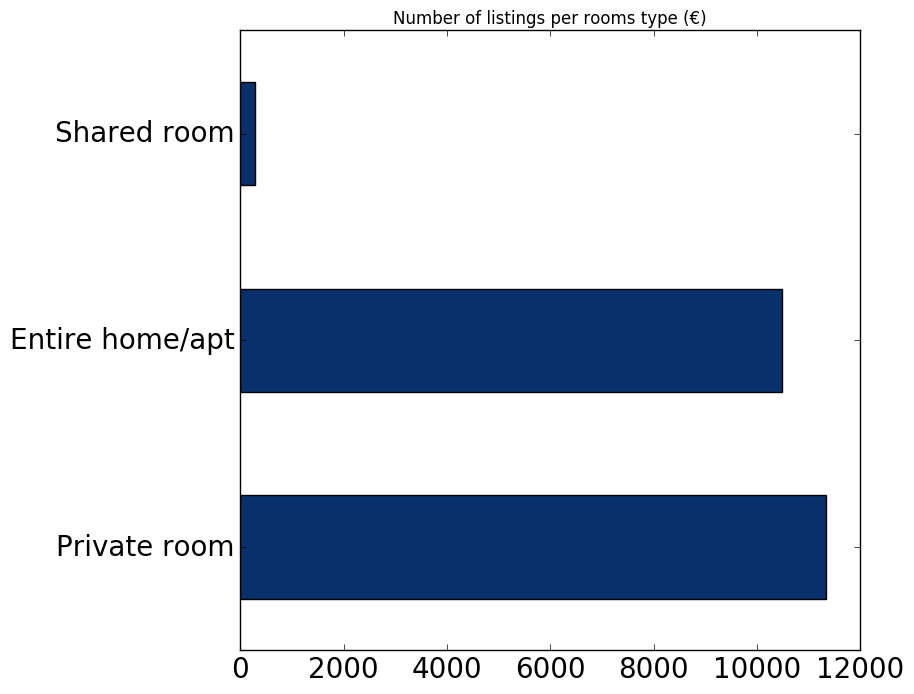

In [19]:
# Plot number of listings per rooms type
room_types = df_list2['room_type'].value_counts()
plot_barh(data = room_types, title='Number of listings per rooms type (€)')

### Question 1.2: What is the average price of the listings per neighbourhood?

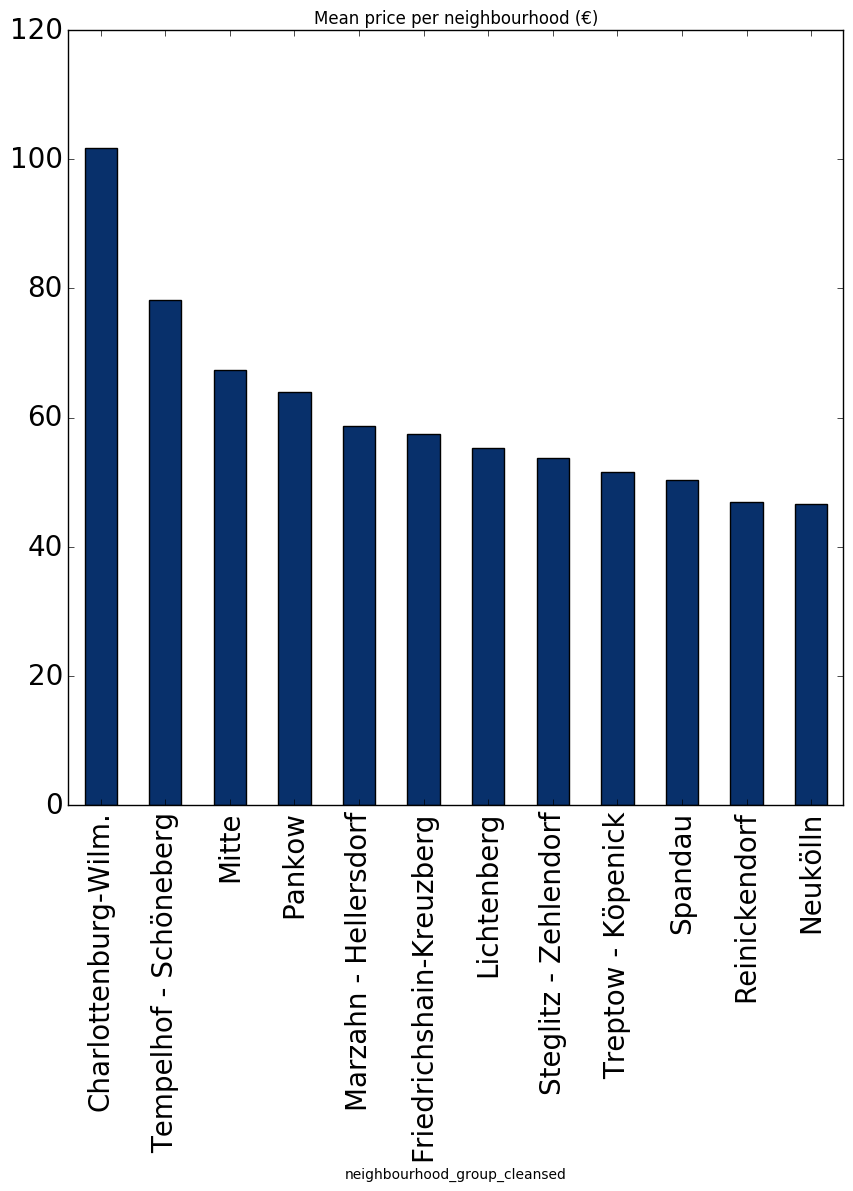

In [20]:
# Plot mean price per neighbourhood
price_per_hood = df_list2.groupby('neighbourhood_group_cleansed').price.mean().sort_values(ascending = False)
plot_bar(data = price_per_hood, title = 'Mean price per neighbourhood (€)')

### Question 1.3: What is the average price of the listings per room type?

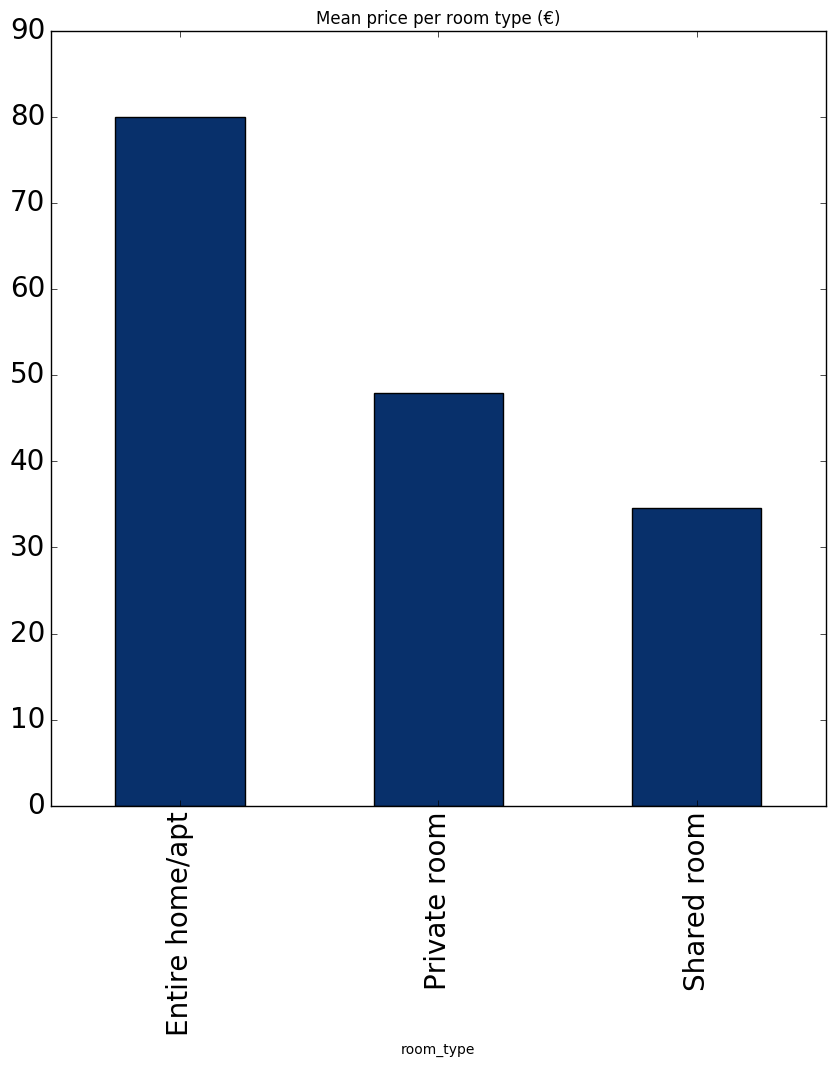

In [21]:
# Plot mean price per per room type
price_per_type = df_list2.groupby('room_type').price.mean().sort_values(ascending = False)
plot_bar(data = price_per_type, title = 'Mean price per room type (€)')

## Question 2: Are so called "gentrified" areas are more affected by Airbnb?¶  

### Question 2.1: How many listings are in the different neighbourhoods of Berlin?

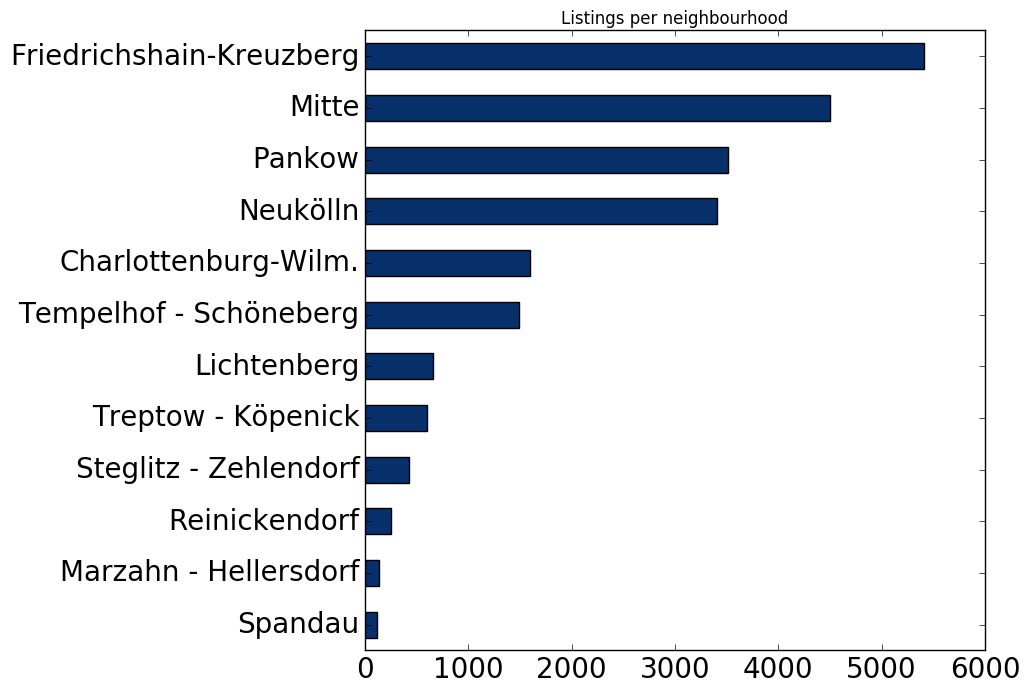

In [22]:
# Plot number of listings per neighbourhood'
neighboors = df_list2.neighbourhood_group_cleansed.value_counts().sort_values()
plot_barh(data = neighboors, title='Listings per neighbourhood')

### Question 2.2: How is the proportion of Airbnb listings in so called "gentrified" neighbourhoods?
Based on different studies I assume the neighbourhoods in Berlin affected most by gentrification are Friedrichshain-Kreuzberg, Neukölln , Mitte and Pankow.

In [23]:
# List of gentrified neighboorhoods
gentri_hood = ['Friedrichshain-Kreuzberg', 'Neukölln' , 'Mitte', 'Pankow']

# check if listing is in gentrified neighboorhood
def gentri_check(df):
    if df.neighbourhood_group_cleansed in gentri_hood:
        return True
    else:
        return False

# Create  a feature 'gentri_hood' to classify if a listing is in a gentried neighbourhood     
df_list2['gentri_hood'] = df_list2.apply (lambda row: gentri_check (row),axis=1)



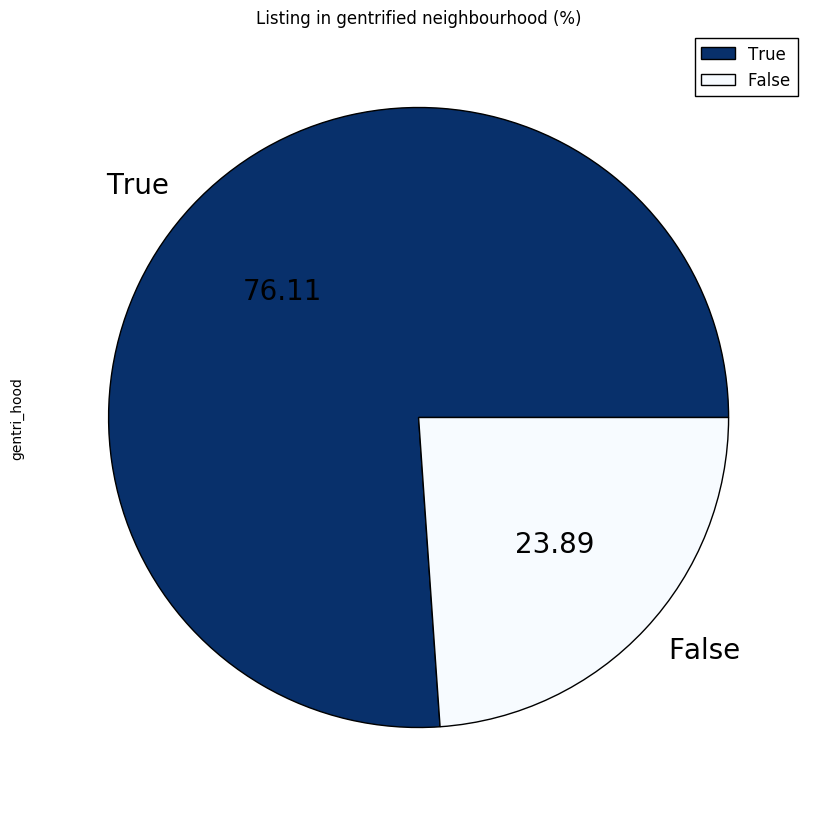

In [24]:
#Pieplot of proportion of listings in so called "gentrified" neighbourhoods
gentri = df_list2['gentri_hood'].value_counts() 
plot_pie(data=gentri, title='Listing in gentrified neighbourhood (%)')

### Question 2.3: How big is the proportion of Airbnb listings compared to the population?

In [25]:
# create dataframe with number of listings
df_neighboors = neighboors.rename_axis('neighbourhood_group_cleansed').reset_index(name='listings')
# merge with population dataset
df_population2 = pd.merge(df_population, df_neighboors, on='neighbourhood_group_cleansed', how='left')
df_population2.set_index('neighbourhood_group_cleansed',inplace=True, drop=True)
# create column with prporotion of listings to population
df_population2['Prop_airbnb']=df_population2.listings/df_population2.Population


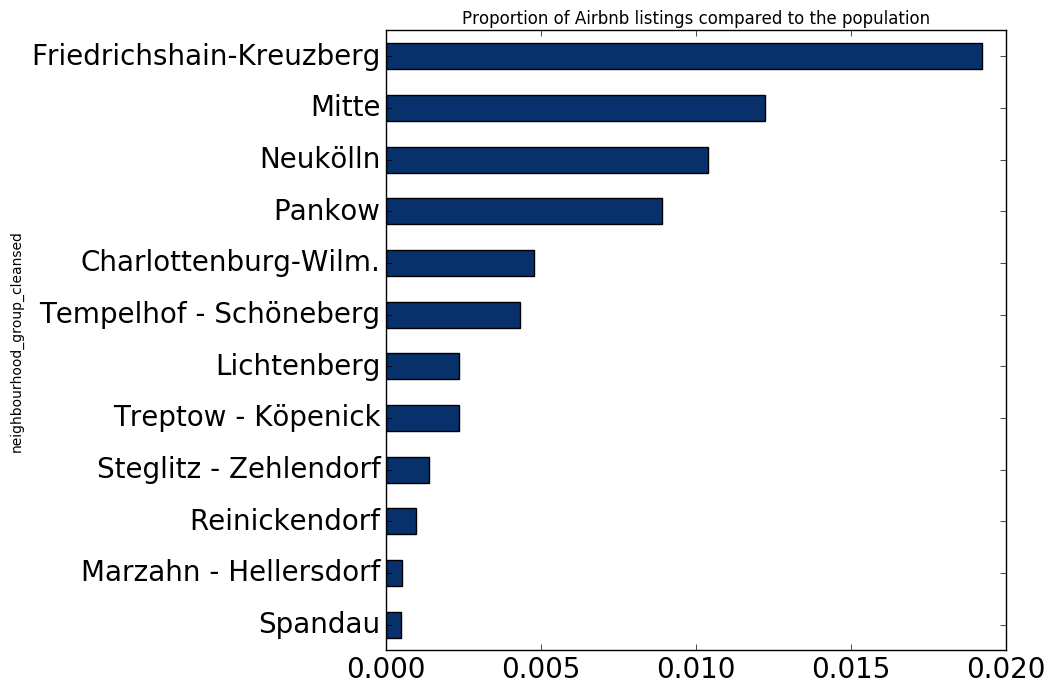

In [26]:
# Plot proportion of Airbnb listings compared to the population'
proportion = df_population2.Prop_airbnb.sort_values()
plot_barh(data = proportion, title='Proportion of Airbnb listings compared to the population')

## Question 3: Are the laws to regulate homesharing in Berlin effective?
 

### Question 3.1: How many listings have a high availabilty? 
The regulation should prevent the rental of an entire home / appartements for a more than 90 days a year. If the listing is available more than 90 days, I assume that the regulation is not followed by the host and the law is not effective in this case.

In [27]:
# Count the availabilty of the listings and create new column with availability
df_avail = df_cal[df_cal.available == 't']
df_avail = pd.DataFrame(df_avail.listing_id.value_counts().reset_index())
df_avail.columns = ['id', 'avail_counts']
df_list3 = pd.merge(df_list2, df_avail, on='id', how='left')
df_list3.avail_counts = df_list3.avail_counts.fillna(0)

# Insert column if listing has high availabilty 
df_list3.loc[df_list3['avail_counts'] > 90, 'high_avail'] = True
df_list3.loc[df_list3['avail_counts'] <= 90, 'high_avail'] = False

df_list3.groupby('room_type').high_avail.value_counts()

room_type        high_avail
Entire home/apt  False         6827
                 True          3662
Private room     False         8582
                 True          2761
Shared room      False          169
                 True           117
Name: high_avail, dtype: int64

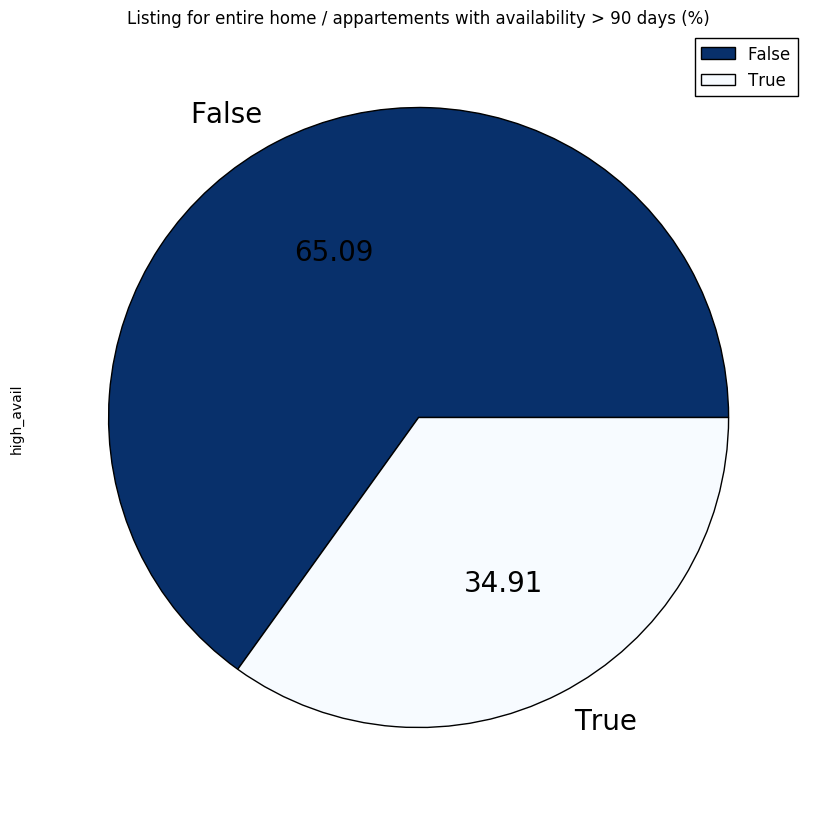

In [28]:
#Pieplot of proportion of listings of entire home with availability > 90 days
high_avail = df_list3['high_avail'][df_list3['room_type'] == 'Entire home/apt'].value_counts() #.plot(kind="pie")
plot_pie(data=high_avail, title='Listing for entire home / appartements with availability > 90 days (%)')

### Question 3.2: How many hosts have multiple listings?

Rental of a private room is only allowed, if the main use of the appartment is by the host itself. So if a host has multiple listings, I assume the main private use of the home by the host is questionable and the regulation may not be effective in this case.  

In [29]:
# Create column for hosts with more than one listings
df_list3.loc[df_list3['host_total_listings_count'] > 1, 'multi_host'] = True
df_list3.loc[df_list3['host_total_listings_count'] <=1, 'multi_host'] = False

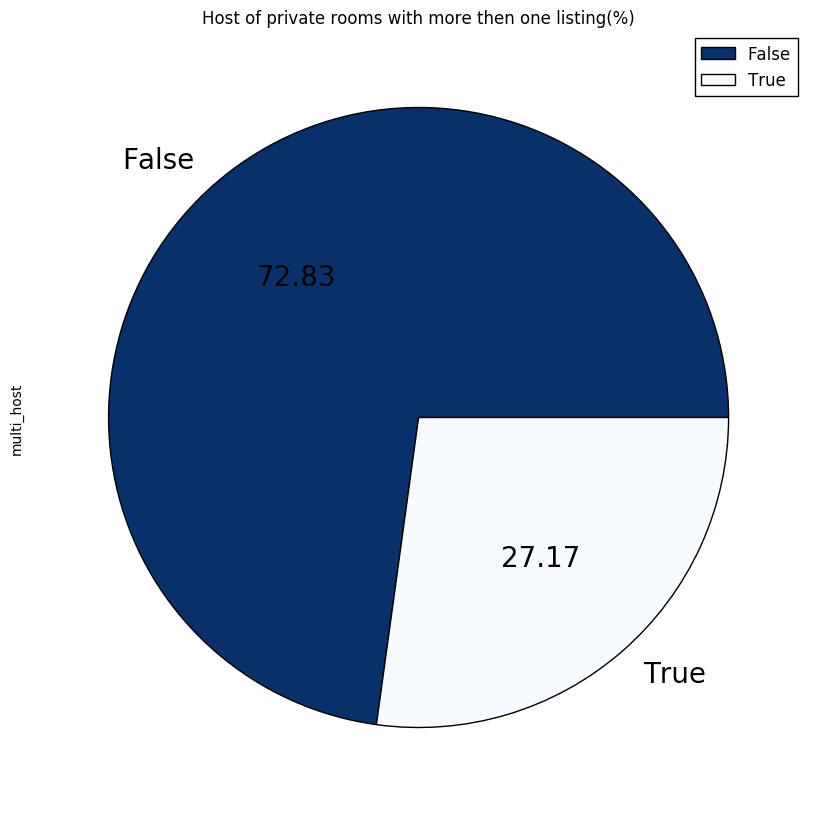

In [30]:
#Pieplot of proportion of hosts of private rooms with more then one listing
multi_listing = df_list3['multi_host'][df_list3['room_type'] == 'Private room'].value_counts() #.plot(kind="pie")
plot_pie(data=multi_listing, title='Host of private rooms with more then one listing(%)')

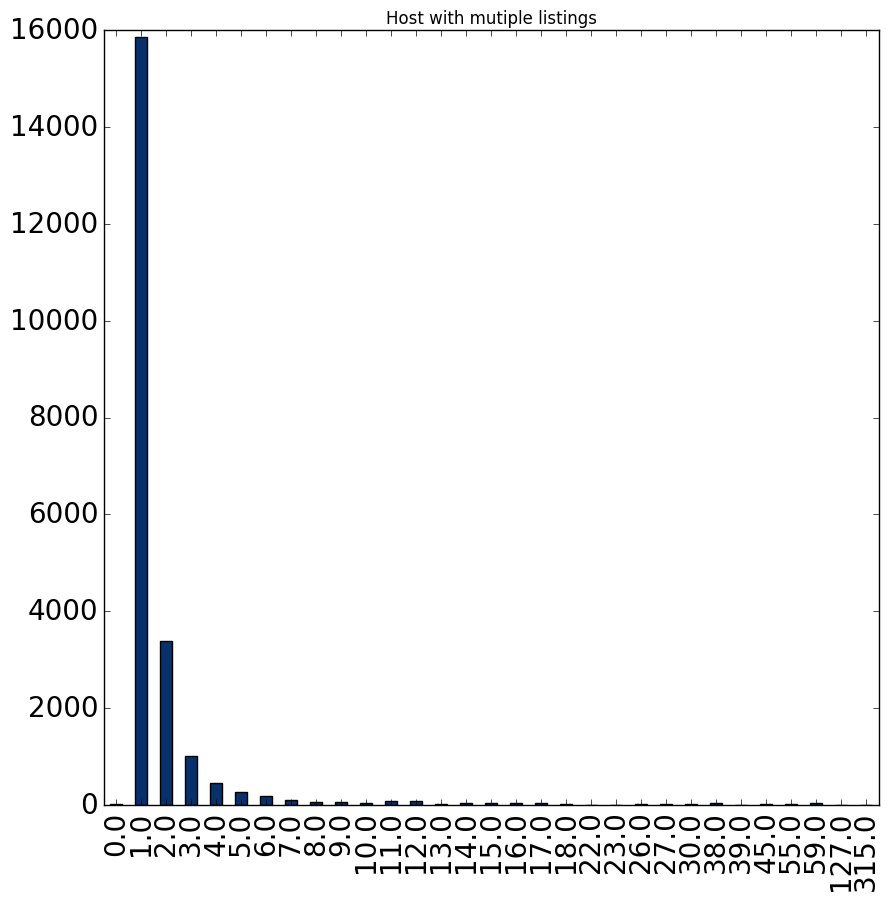

In [31]:
# Number of hosts with multiple listings
multi_host = df_list3.host_total_listings_count.value_counts().sort_index()
plot_bar(data = multi_host, title = 'Host with mutiple listings')